In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_red = pd.read_csv('../Data/Raw/wine/winequality-red.csv', sep=';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df_white = pd.read_csv('../Data/Raw/wine/winequality-white.csv', sep=';')
df_white.head()

In [15]:
print('Red',df_red.shape)

Red (1599, 12)


In [16]:
print('White',df_white.shape)

White (4898, 12)


In [17]:
df_red[df_red['quality']>=5].shape

(1536, 12)

In [18]:
df_red['red'] = 1
df_white['red'] = 0

In [19]:
df_concat = pd.concat([df_red, df_white])

In [20]:
df_concat.min()

fixed acidity           3.80000
volatile acidity        0.08000
citric acid             0.00000
residual sugar          0.60000
chlorides               0.00900
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.98711
pH                      2.72000
sulphates               0.22000
alcohol                 8.00000
quality                 3.00000
red                     0.00000
dtype: float64

In [21]:
df_concat.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [22]:
faixa_dinamica = pd.concat([df_concat.min(),df_concat.max()],axis =1)
faixa_dinamica.columns = ['Min','Max']
faixa_dinamica['Range'] =faixa_dinamica['Max'] - faixa_dinamica['Min']
faixa_dinamica

,Min,Max,Range
fixed acidity,3.80000,15.90000,12.10000
volatile acidity,0.08000,1.58000,1.50000
citric acid,0.00000,1.66000,1.66000
residual sugar,0.60000,65.80000,65.20000
chlorides,0.00900,0.61100,0.60200
free sulfur dioxide,1.00000,289.00000,288.00000
total sulfur dioxide,6.00000,440.00000,434.00000
density,0.98711,1.03898,0.05187
pH,2.72000,4.01000,1.29000
sulphates,0.22000,2.00000,1.78000


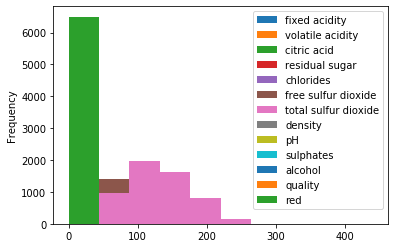

In [23]:
df_concat.plot(kind ='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020513924248>,
      dtype=object)

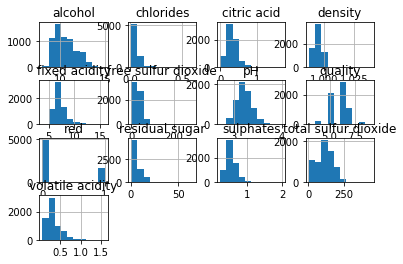

In [24]:
df_concat.hist()


<Figure size 432x288 with 0 Axes>

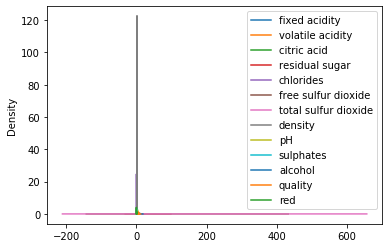

In [25]:
plt.figure()
df_concat.plot.kde()

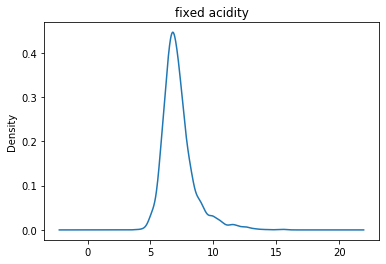

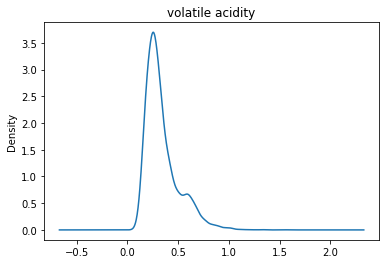

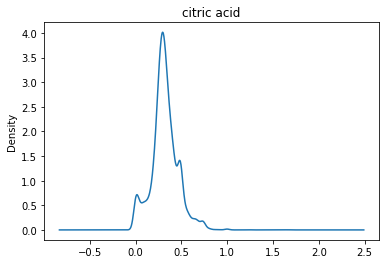

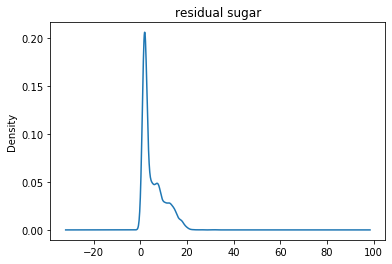

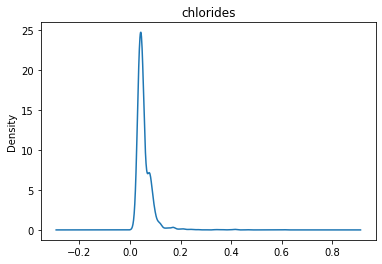

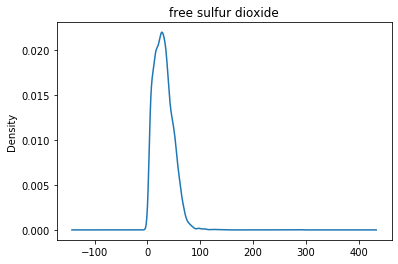

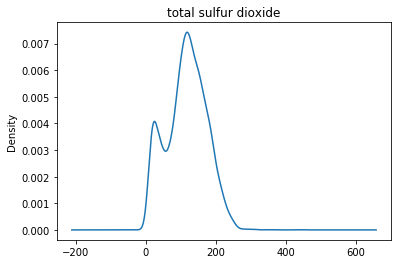

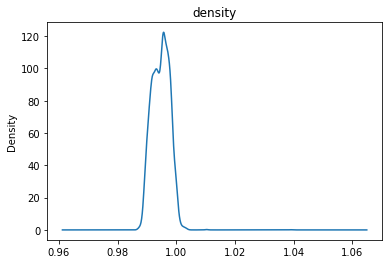

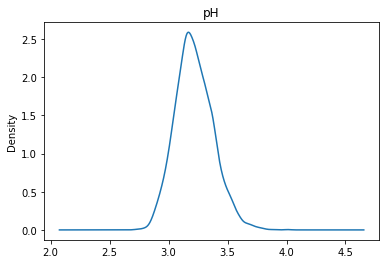

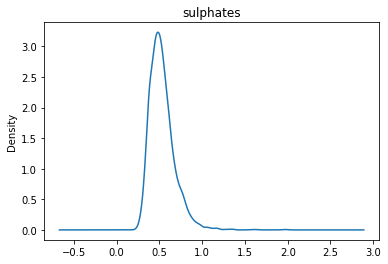

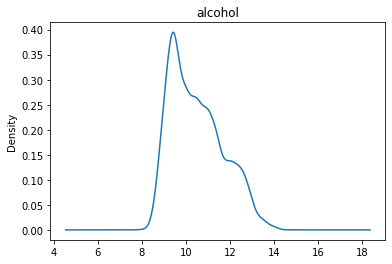

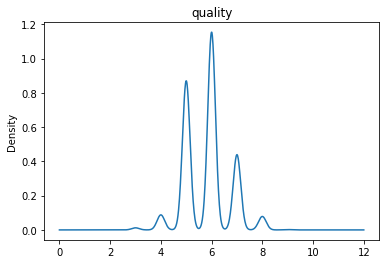

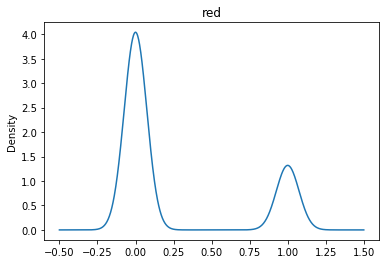

In [26]:
for cname in  df_concat.columns:
    plt.figure()
    df_concat[cname].plot.kde()
    plt.title(cname)

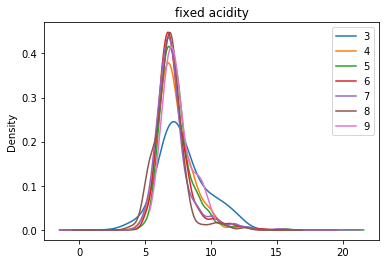

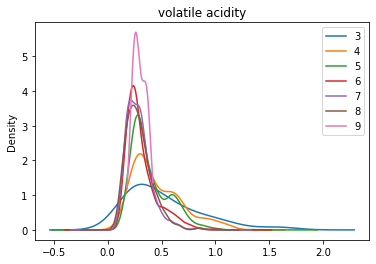

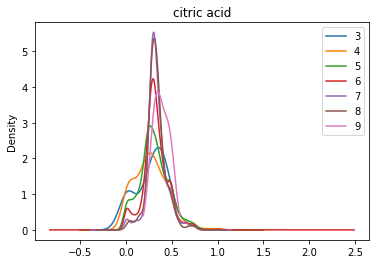

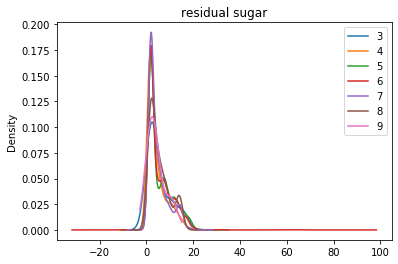

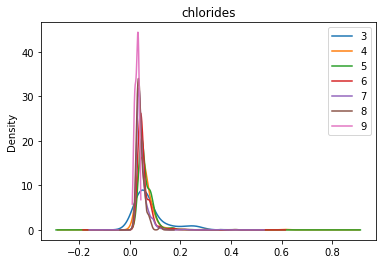

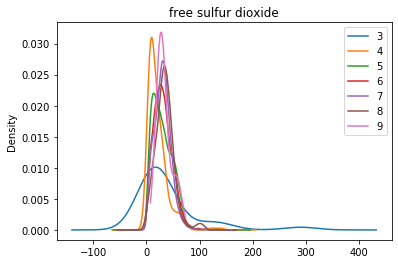

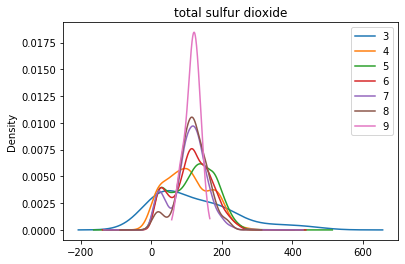

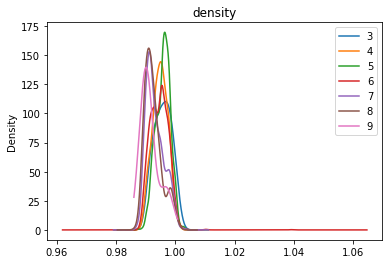

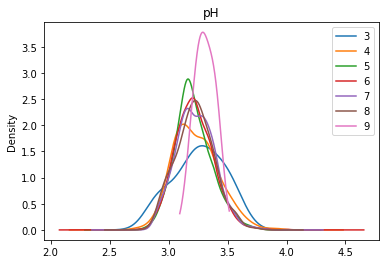

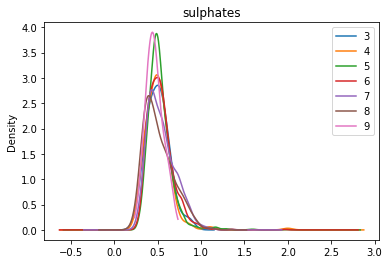

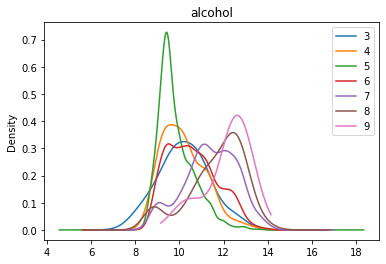

In [27]:
for cname in  df_concat.columns[:len(df_concat.columns)-2]:
    plt.figure()
    df_concat.groupby('quality')[cname].plot.kde(legend =True)
    plt.title(cname)

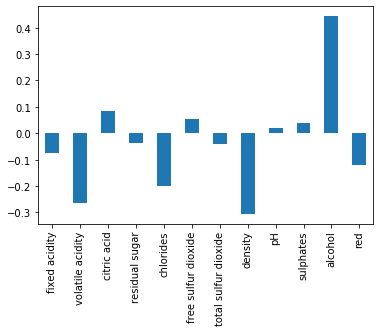

In [28]:
df_concat.corr()['quality'].drop('quality').plot.bar()

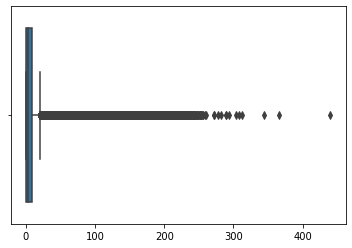

In [35]:
sns.boxplot(df_concat)

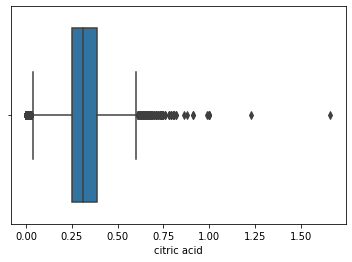

In [38]:
sns.boxplot(df_concat['citric acid'])

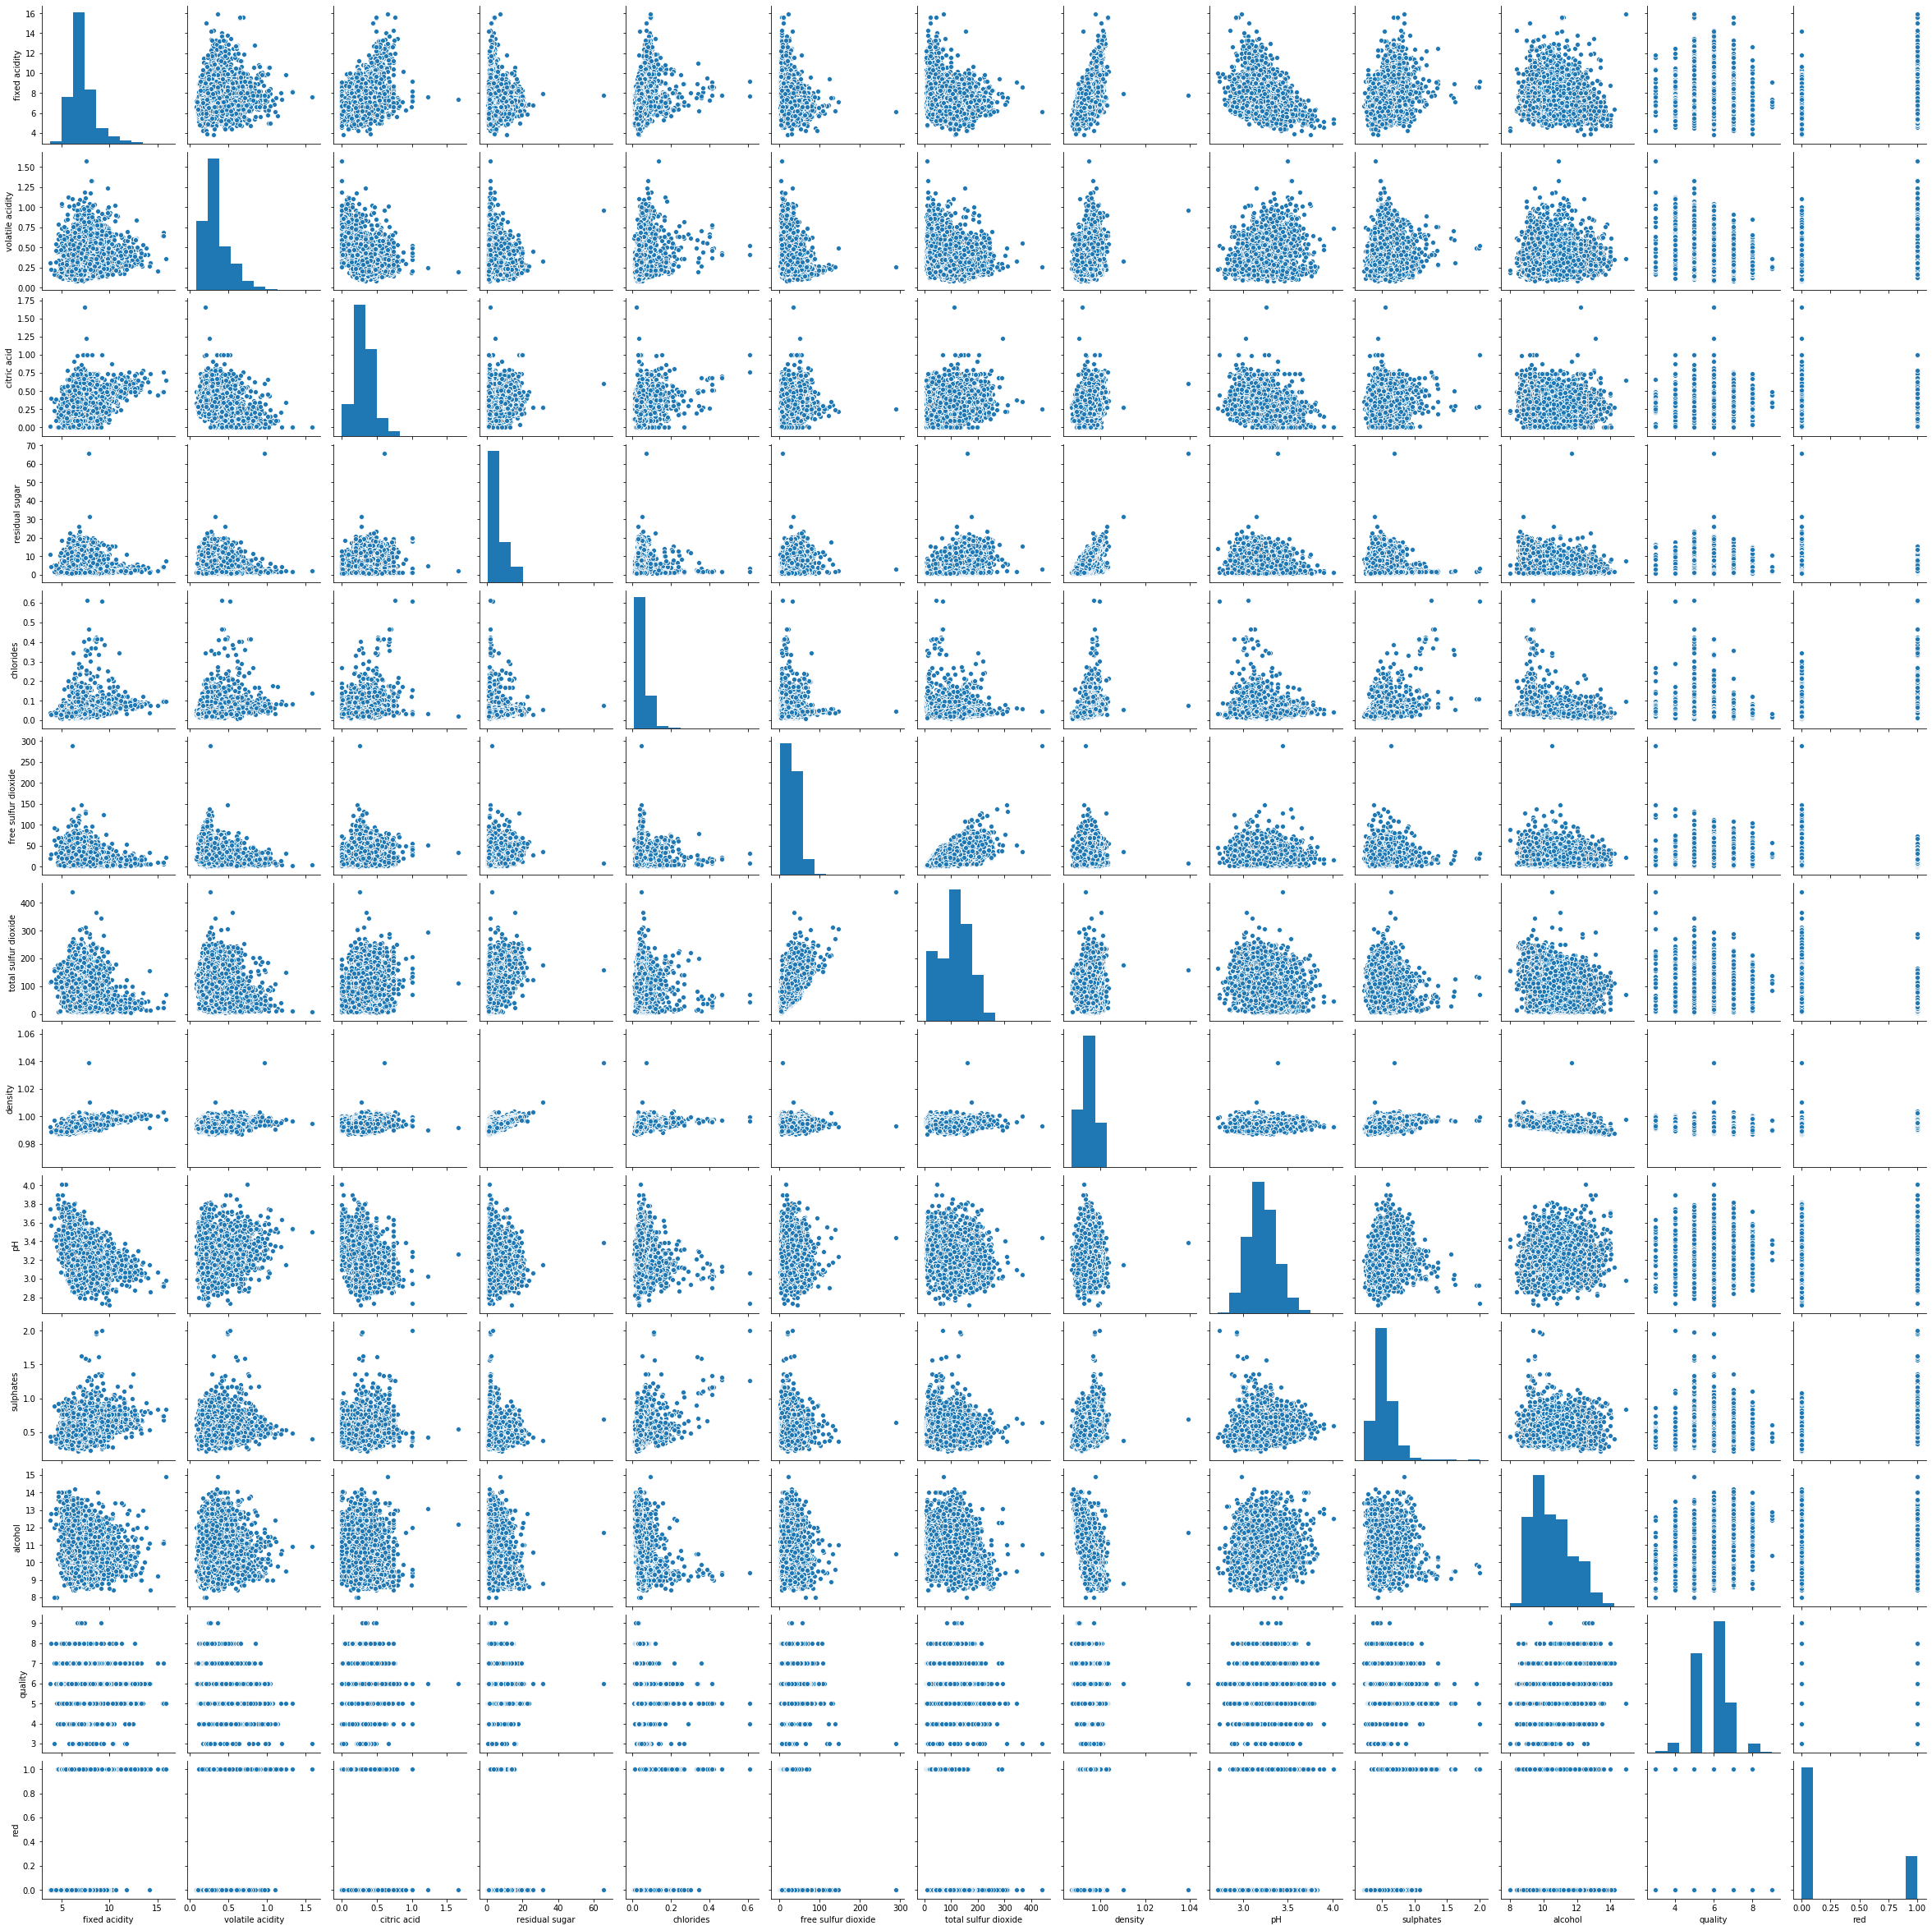

In [31]:
sns.pairplot(df_concat)